# Youtube Comment Sentimental Analysis
## ON ANDROID IS BETTER THAN IOS


In [6]:
# !pip install obsei dateparser
# # code credit - Lalit Pagaria - https://github.com/obsei/obsei/blob/master/example/youtube_scrapper_example.py

In [7]:
from obsei.source import YoutubeScrapperSource, YoutubeScrapperConfig
from obsei.analyzer.classification_analyzer import ClassificationAnalyzerConfig,ZeroShotClassificationAnalyzer

### video about : 10 Reasons Android is Better than iOS! 
[link](https://www.youtube.com/watch?v=jj1uQS2Vxxk)

Analysis 

Question : does people accepts this video or opposes the video ?

In [8]:
video_url = 'https://www.youtube.com/watch?v=jj1uQS2Vxxk'

In [9]:
source_config = YoutubeScrapperConfig(video_url= video_url,fetch_replies=False,max_comments=20,lookup_period="1Y",)
source = YoutubeScrapperSource()
source_response_list = source.lookup(source_config)

source_response_list[0],len(source_response_list)

09/16/2022 13:05:59 - WARNING - obsei.misc.youtube_reviews_scrapper -   Unable to set sorting


(TextPayload(segmented_data={}, meta={'comment_id': 'UgwE2_j6TzSW0-yhwax4AaABAg', 'text': "One Thing you miss is , Apple's repair cost is almost 3x the price compared to Android , Example - Both S22 ultra and 13 pro has wireless charging but replacement of back glass in 13 pro costs +20K while   S22 only costs arround 5-6K ,you can say 13 pro has Mag safe but common it's just a Magnetic ring", 'time': datetime.datetime(2022, 8, 16, 13, 5, 59, 520543, tzinfo=datetime.timezone.utc), 'author': 'Althaf Hussain', 'channel': 'UCE4JIZTC7KU9j-3hSDz3rzw', 'votes': '690', 'photo': 'https://yt3.ggpht.com/ytc/AMLnZu95vipDwHz_n98oN1qezA08enMPcZQ5V9k6iNCrHQ=s176-c-k-c0x00ffffff-no-rj', 'heart': False}, source_name='YoutubeScrapper', processed_text="One Thing you miss is , Apple's repair cost is almost 3x the price compared to Android , Example - Both S22 ultra and 13 pro has wireless charging but replacement of back glass in 13 pro costs +20K while   S22 only costs arround 5-6K ,you can say 13 pro h

In [10]:
# Stop words according to video
Video_Taglines = []

In [11]:
# for idx, source_response in enumerate(source_response_list):
#     print(f"source_response#'{idx}'='{source_response.__dict__}'")

### Pre Build Classifier : "ZeroShotClassificationAnalyzer"

In [12]:
text_analyzer = ZeroShotClassificationAnalyzer(model_name_or_path="typeform/mobilebert-uncased-mnli", device="auto")
analyzer_response_list = text_analyzer.analyze_input(source_response_list=source_response_list,analyzer_config=ClassificationAnalyzerConfig(labels=["positive", "negative"],),)
analyzer_response_list[0]
# for idx, an_response in enumerate(analyzer_response_list):
#     print(f"analyzer_response#'{idx}'='{an_response.__dict__}'")

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


TextPayload(segmented_data={'classifier_data': {'negative': 0.9689710140228271, 'positive': 0.0004741481097880751}}, meta={'comment_id': 'UgwE2_j6TzSW0-yhwax4AaABAg', 'text': "One Thing you miss is , Apple's repair cost is almost 3x the price compared to Android , Example - Both S22 ultra and 13 pro has wireless charging but replacement of back glass in 13 pro costs +20K while   S22 only costs arround 5-6K ,you can say 13 pro has Mag safe but common it's just a Magnetic ring", 'time': datetime.datetime(2022, 8, 16, 13, 5, 59, 520543, tzinfo=datetime.timezone.utc), 'author': 'Althaf Hussain', 'channel': 'UCE4JIZTC7KU9j-3hSDz3rzw', 'votes': '690', 'photo': 'https://yt3.ggpht.com/ytc/AMLnZu95vipDwHz_n98oN1qezA08enMPcZQ5V9k6iNCrHQ=s176-c-k-c0x00ffffff-no-rj', 'heart': False}, source_name='YoutubeScrapper', processed_text="One Thing you miss is , Apple's repair cost is almost 3x the price compared to Android , Example - Both S22 ultra and 13 pro has wireless charging but replacement of back

In [13]:
import pandas as pd
import numpy as np
from tqdm import tqdm
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from obsei.sink.pandas_sink import PandasSink, PandasSinkConfig

sink_config = PandasSinkConfig(dataframe=pd.DataFrame())
sink = PandasSink()
df = sink.send_data(analyzer_response_list, sink_config)
df.head(2)

c:\Users\yalla\anaconda3\lib\site-packages\obsei\sink\pandas_sink.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  config.dataframe = config.dataframe.append(responses)


,processed_text,segmented_data_classifier_data_negative,segmented_data_classifier_data_positive,meta_comment_id,meta_text,meta_time,meta_author,meta_channel,meta_votes,meta_photo,meta_heart,source_name
0,"One Thing you miss is , Apple's repair cost is...",0.97,0.00,UgwE2_j6TzSW0-yhwax4AaABAg,"One Thing you miss is , Apple's repair cost is...",2022-08-16 13:05:59.520543+00:00,Althaf Hussain,UCE4JIZTC7KU9j-3hSDz3rzw,690,https://yt3.ggpht.com/ytc/AMLnZu95vipDwHz_n98o...,False,YoutubeScrapper
1,The foremost reason I'll be sticking to androi...,0.00,0.75,UgzGneo6K0PIlO9cE5V4AaABAg,The foremost reason I'll be sticking to androi...,2022-08-16 13:05:59.520543+00:00,Kumar Pratyush,UC5OW2SmM0H84gg3p3QiLqbg,290,https://yt3.ggpht.com/ytc/AMLnZu9hdDIqLfIlFFmu...,False,YoutubeScrapper


<AxesSubplot:>

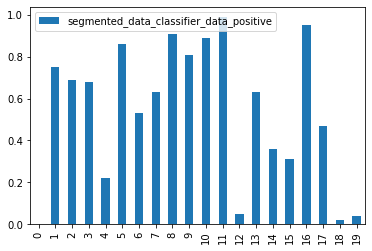

In [14]:
df.loc[df['segmented_data_classifier_data_negative'].astype('float')>0.5]
df[['segmented_data_classifier_data_positive']].astype('float').plot.bar()

### My Sentimental Analysis

Analysis Steps :

0. Question : does people accepts this video or opposes the video ?
1. Data Cleaning
2. EDA
3. Techniques 
4. Insights 

## 1. DATA
### 1.1 DATA GATHERING

In [15]:
df = df[['processed_text','meta_votes']]
df.head()

,processed_text,meta_votes
0,"One Thing you miss is , Apple's repair cost is...",690
1,The foremost reason I'll be sticking to androi...,290
2,Always will be an Android lover for mainly two...,61
3,"As someone said \n""Iphone supported by company...",191
4,"We keep saying it's a choice, but I think it's...",38


### 1.2 DATA CLEANING 

**Common data cleaning steps on all text:**
* Make text all lower case
* Remove punctuation
* Remove numerical values
* Remove common non-sensical text (/n)
* Tokenize text
* Remove stop words

In [16]:
df['processed_text'][6]

'NO.1 point was absolutely right, if iPhone were the only thing available in India, only around 40% of the whole population of India would have had access to a smartphone or maybe even less. Btw I am using a Redmi Note 7 with Android 12 (Custom ROMs are a lifeline).'

In [17]:
import re
import string

def clean_text_round1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)
df_clean = pd.DataFrame(df.processed_text.apply(round1))
df_clean.head()

,processed_text
0,one thing you miss is apples repair cost is a...
1,the foremost reason ill be sticking to android...
2,always will be an android lover for mainly two...
3,as someone said \niphone supported by company\...
4,we keep saying its a choice but i think its ti...


In [18]:
def clean_text_round2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)
df_clean = pd.DataFrame(df_clean.processed_text.apply(round2))
df_clean.head()

,processed_text
0,one thing you miss is apples repair cost is a...
1,the foremost reason ill be sticking to android...
2,always will be an android lover for mainly two...
3,as someone said iphone supported by companyand...
4,we keep saying its a choice but i think its ti...


### 1.3 Create Counted words - CountVector

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
df_cv = cv.fit_transform(df_clean.processed_text)
df_cv

<20x308 sparse matrix of type '<class 'numpy.int64'>'
	with 432 stored elements in Compressed Sparse Row format>

In [20]:
df_matrix = pd.DataFrame(df_cv.toarray(),columns=cv.get_feature_names())
df_matrix.head()

c:\Users\yalla\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,able,absolutely,access,accessory,activities,ad,admit,adopt,ads,affect,affordable,agree,agreed,andorid,android,animations,app,apple,apples,apps,arent,arround,ask,available,away,backbone,banning,basically,better,big,blocker,boils,boring,bother,browser,btw,budget,businessmen,busy,buy,buying,calls,care,case,central,change,changing,charging,choice,chooses,citizen,common,community,companies,companyandroid,compared,completely,consistency,cost,costs,created,custom,customer,customers,customisation,cut,decide,delayed,determine,developers,device,devices,different,digital,display,does,doesnt,dont,ecosystem,educational,effort,exactly,example,fanlove,far,feature,feel,feels,file,financially,flagships,flashed,foremost,forget,freedom,functionality,gamer,games,general,glass,good,google,govt,great,group,guess,guys,hater,holding,hosting,hours,huge,icon,idk,ill,im,imagine,impact,important,improvement,includes,income,incredible,india,individuals,ios,iphone,iphones,job,just,kept,kind,know,laid,launcher,laws,leader,learn,legit,lifeline,lifesaver,like,listen,lithium,live,lmao,ln,lockscreen,long,longiphones,look,looks,lot,love,lover,loves,low,mag,magnetic,maharashtra,mainly,make,makes,making,manager,masses,matter,maybe,miss,missed,mod,modded,mood,multitasking,nasty,need,needs,new,notch,note,notification,ofc,open,opening,opiniona,options,organized,os,outdated,owning,pack,patting,pay,people,person,phone,phones,point,pointsgreat,population,popup,possible,pratik,pretty,price,pro,product,products,proper,quality,rapping,reach,reader,really,reason,reasons,record,recording,records,redmi,refuse,regarding,related,relax,remember,repair,repeat,replacement,request,revamp,revanced,right,ring,roms,root,rooting,safe,said,samsung,saw,say,saying,seeing,senior,sense,september,server,settle,shift,shifting,showcasing,sideloading,simple,simplicity,simply,small,smartphone,source,specifically,splitscreen,sponsor,spotify,sticking,study,support,supported,surfshark,switch,switching,systemless,tachiyomi,team,teamtechwiser,teamtechwiswer,thanks,thats,theres,thier,thing,things,think,thoughtful,time,tons,totally,ultimately,ultra,updates,usage,use,used,useful,users,using,usually,video,videography,vpn,want,wireless,words,work,xiaomi,xmanager,yeah,years,youtube,yt
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [21]:
df_matrix = df_matrix.transpose()
df_matrix.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
able,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
absolutely,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
access,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
accessory,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
activities,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [22]:
# Find the top 30 words
top_dict = {}
for c in df_matrix.columns:
    top = df_matrix[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))
top_dict

{0: [('pro', 3),
  ('costs', 2),
  ('safe', 1),
  ('android', 1),
  ('just', 1),
  ('ultra', 1),
  ('cost', 1),
  ('glass', 1),
  ('arround', 1),
  ('apples', 1),
  ('compared', 1),
  ('say', 1),
  ('price', 1),
  ('replacement', 1),
  ('example', 1),
  ('magnetic', 1),
  ('mag', 1),
  ('ring', 1),
  ('charging', 1),
  ('thing', 1),
  ('common', 1),
  ('wireless', 1),
  ('miss', 1),
  ('repair', 1),
  ('product', 0),
  ('pratik', 0),
  ('rapping', 0),
  ('products', 0),
  ('proper', 0),
  ('quality', 0)],
 1: [('use', 2),
  ('ios', 2),
  ('im', 2),
  ('apps', 2),
  ('android', 2),
  ('able', 1),
  ('foremost', 1),
  ('sticking', 1),
  ('cost', 1),
  ('simple', 1),
  ('sideloading', 1),
  ('device', 1),
  ('display', 1),
  ('say', 1),
  ('ecosystem', 1),
  ('financially', 1),
  ('repair', 1),
  ('freedom', 1),
  ('tons', 1),
  ('reasons', 1),
  ('reason', 1),
  ('idk', 1),
  ('ill', 1),
  ('pay', 1),
  ('lifeline', 1),
  ('ofc', 1),
  ('modded', 1),
  ('low', 1),
  ('make', 1),
  ('budg

In [23]:
from collections import Counter
# top 30 words
words = []
for audience in df_matrix.columns:
    top = [word for (word, count) in top_dict[audience]]
    for t in top:
        words.append(t)
words

['pro',
 'costs',
 'safe',
 'android',
 'just',
 'ultra',
 'cost',
 'glass',
 'arround',
 'apples',
 'compared',
 'say',
 'price',
 'replacement',
 'example',
 'magnetic',
 'mag',
 'ring',
 'charging',
 'thing',
 'common',
 'wireless',
 'miss',
 'repair',
 'product',
 'pratik',
 'rapping',
 'products',
 'proper',
 'quality',
 'use',
 'ios',
 'im',
 'apps',
 'android',
 'able',
 'foremost',
 'sticking',
 'cost',
 'simple',
 'sideloading',
 'device',
 'display',
 'say',
 'ecosystem',
 'financially',
 'repair',
 'freedom',
 'tons',
 'reasons',
 'reason',
 'idk',
 'ill',
 'pay',
 'lifeline',
 'ofc',
 'modded',
 'low',
 'make',
 'budget',
 'phone',
 'android',
 'usage',
 'does',
 'different',
 'device',
 'reasons',
 'group',
 'customer',
 'hours',
 'completely',
 'income',
 'feel',
 'just',
 'boring',
 'like',
 'lover',
 'revamp',
 'mainly',
 'matter',
 'look',
 'years',
 'mood',
 'love',
 'really',
 'reader',
 'maybe',
 'rapping',
 'reach',
 'masses',
 'supported',
 'companyandroid',
 'sai

In [24]:
Counter(words).most_common()

[('pro', 15),
 ('product', 14),
 ('price', 13),
 ('products', 13),
 ('android', 12),
 ('pratik', 12),
 ('rapping', 12),
 ('proper', 12),
 ('quality', 12),
 ('pretty', 12),
 ('possible', 11),
 ('popup', 11),
 ('ios', 10),
 ('reach', 10),
 ('reader', 8),
 ('population', 8),
 ('repeat', 8),
 ('replacement', 7),
 ('repair', 7),
 ('able', 7),
 ('really', 7),
 ('just', 6),
 ('phone', 6),
 ('pointsgreat', 6),
 ('apps', 5),
 ('like', 5),
 ('point', 5),
 ('thing', 4),
 ('device', 4),
 ('reason', 4),
 ('make', 4),
 ('request', 4),
 ('remember', 4),
 ('dont', 4),
 ('phones', 4),
 ('people', 4),
 ('say', 3),
 ('miss', 3),
 ('use', 3),
 ('im', 3),
 ('reasons', 3),
 ('years', 3),
 ('love', 3),
 ('maybe', 3),
 ('iphone', 3),
 ('regarding', 3),
 ('relax', 3),
 ('things', 3),
 ('apple', 3),
 ('lot', 3),
 ('great', 3),
 ('india', 3),
 ('better', 3),
 ('video', 3),
 ('cost', 2),
 ('charging', 2),
 ('sideloading', 2),
 ('freedom', 2),
 ('ill', 2),
 ('lifeline', 2),
 ('modded', 2),
 ('budget', 2),
 ('usage

In [25]:
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['pro',
 'product',
 'price',
 'products',
 'android',
 'pratik',
 'rapping',
 'proper',
 'quality',
 'pretty',
 'possible',
 'popup',
 'ios',
 'reach',
 'reader',
 'population',
 'repeat',
 'replacement',
 'repair',
 'able',
 'really']

In [26]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
df_cv = cv.fit_transform(df_clean.processed_text)
df_stop = pd.DataFrame(df_cv.toarray(), columns=cv.get_feature_names())
df_stop.index = df_clean.index


c:\Users\yalla\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
# !pip install wordcloud

### 2 .Exploratory Data Analysis 

In [28]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

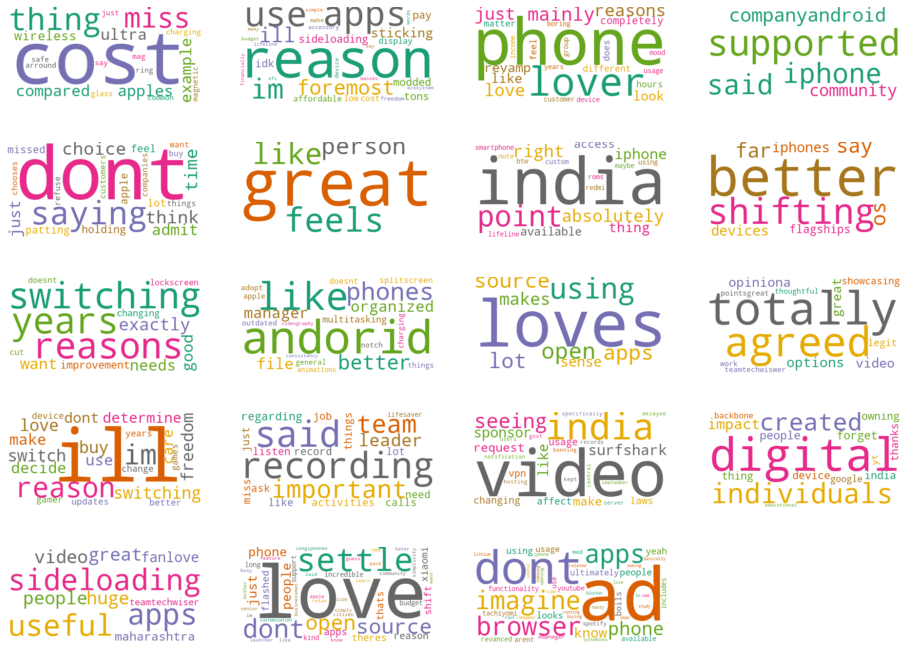

In [30]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 12]

# Create subplots for each comment
for index, comment in enumerate(df_stop.columns):
    wc.generate(df_clean.processed_text[index])
    if index > 18 : break
    plt.subplot(5, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    
plt.show()

In [31]:
df_clean.head()

,processed_text
0,one thing you miss is apples repair cost is a...
1,the foremost reason ill be sticking to android...
2,always will be an android lover for mainly two...
3,as someone said iphone supported by companyand...
4,we keep saying its a choice but i think its ti...


In [32]:
# !pip install textblob

### 3. Sentimental Analysis

In [33]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df_clean['polarity'] = df_clean['processed_text'].apply(pol)
df_clean['subjectivity'] = df_clean['processed_text'].apply(sub)
df_clean

,processed_text,polarity,subjectivity
0,one thing you miss is apples repair cost is a...,0.050000,0.500000
1,the foremost reason ill be sticking to android...,0.100000,0.630357
2,always will be an android lover for mainly two...,-0.083333,0.633333
3,as someone said iphone supported by companyand...,0.000000,0.000000
4,we keep saying its a choice but i think its ti...,0.066667,0.066667
5,ios is great but android feels like that one p...,0.800000,0.750000
6,point was absolutely right if iphone were the...,0.119841,0.567063
7,after shifting from android to ios i will say ...,0.400000,0.625000
8,after switching from android to ios years ba...,0.237500,0.212500
9,proper file manager and well organized multi...,0.130000,0.446667


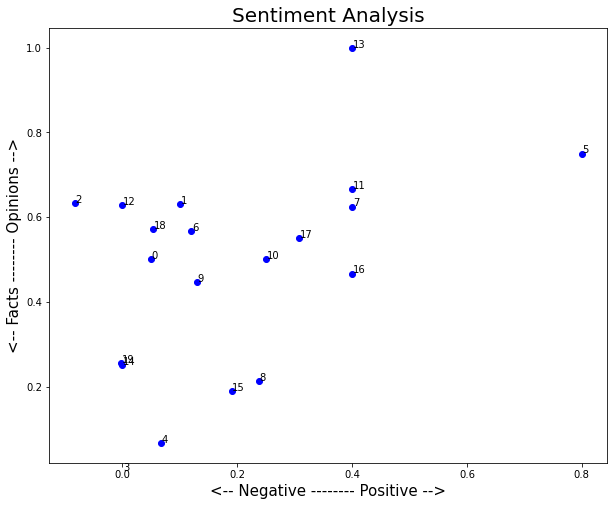

In [34]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10,8 ]

for index, comment in enumerate(df_clean.index):
    x = df_clean.polarity.loc[comment]
    y = df_clean.subjectivity.loc[comment]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, str(index), fontsize=10)
    # plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [35]:
# Analysing to group them
#  5 -> extreme 1
# 14 -> extreme 2

df_clean.loc[5]['processed_text']

'ios is great but android feels like that one person with whom we can be whatever we are'

In [36]:
df_clean.loc[19]['processed_text']

'one thing you guys forget there are so many developers who make android apps whether small or big  they even make the modded apps the amount of developers making ios apps are very less usually the just use the apps which the apple makes but this is not the case in android i think we can all agree if we have used an android phone we have used a modded app all thanks to the android developers for thier time and effort'

### 5. Insights
Declaration: 
- Its a monopoly of Android so all of the Comments are accepting the Video
- but, we can use this model to diffrentiate relevent and irrelevent comments 

- Irrelevent -> Less Polarity and Negative
- Relevent -> High Polarity and Positive